In [1]:
!pip install yfinance --quiet

In [2]:
!pip install fredapi --quiet

In [3]:
!pip install openpyxl --quiet

In [34]:
!pip install keras-tcn --quiet

In [37]:
!pip install pytorch-tabnet --quiet

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.5/44.5 kB 2.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 1.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 46.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 24.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 22.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 873.2 kB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 6.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 14.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 6.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 4.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 60.3 MB/s eta 0:00:00


In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from datetime import datetime
import pytz
import numpy as np


In [5]:
import yfinance as yf
import pandas as pd

# Parameters
ticker = "CAD=X"
start_date = "2011-01-01"
end_date = "2025-04-01"


# Step 1: Download data
forex_raw = yf.download(ticker, start=start_date, end=end_date, interval="1d")

# Step 2: Extract Close price and clean
forex_df = forex_raw[['Close']].reset_index()
forex_df.columns = ['Date', 'USDCAD']
forex_df.dropna(inplace=True)

# how preview
display(forex_df.head())


YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  1 of 1 completed


,Date,USDCAD
0,2011-01-03,0.99270
1,2011-01-04,0.99239
2,2011-01-05,0.99700
3,2011-01-06,0.99650
4,2011-01-07,0.99750


In [6]:
# Print column names
print(" Available columns in forex_df:")
print(forex_df.columns)

# Attempt to identify the Close price column
for col in forex_df.columns:
    if "Close" in str(col):
        print(f"Found close column: {col}")

 Available columns in forex_df:
Index(['Date', 'USDCAD'], dtype='object')


In [7]:
from fredapi import Fred
fred = Fred(api_key="YOUR_KEY")

In [ ]:
start_date="2011-01-01"
end_date="2025-04-01"

In [18]:
# "CPALTT01CAM657N", # "CPALTT01CAM659N"


usa_series = {

    "US_Interest_Rate"         : "FEDFUNDS",
    "US_CPI"                   : "CPIAUCSL",
    "US_Unemployment_Rate"     : "UNRATE",
    "US_10y_Yield"             : "DGS10",
    "US_Exports"               : "EXPGS",
    "US_Imports"               : "IMPGS",
    "US_House_Price_Index"     : "CSUSHPINSA",
    "US_Retail_Spend"          : "PCEC",
}




canada_series = {

    "CA_Interest_Rate"         : "IRSTCB01CAM156N",
    "CA_CPI"                   : "CANCPIALLMINMEI",
    "CA_Unemployment_Rate"     : "LRUNTTTTCAM156S",
    "CA_10y_Yield"             : "IRLTLT01CAM156N",
    "CA_Exports"               : "XTEXVA01CAQ667S",
    "CA_Imports"               : "XTIMVA01CAQ667S",
    "CA_House_Price_Index"     : "QCAR628BIS",
    "CA_Retail_Spend"          : "NCPHISAXDCCAQ", #"SLRTTO02CAQ661S",

}


# Fetch USA data
dataframe_usa = {}
for label, sid in usa_series.items():
    try:
        dataframe_usa[label] = fred.get_series(sid, start_date, end_date)
        print(f"Fetched USA: {label}")
    except Exception as e:
        print(f"Failed to fetch USA {label}: {e}")
dataframe_usa = pd.DataFrame(dataframe_usa)

# Format index to YYYY-MM-DD
dataframe_usa.index = pd.to_datetime(dataframe_usa.index).strftime('%Y-%m-%d')
dataframe_usa.reset_index(inplace=True)
dataframe_usa.rename(columns={'index': 'Date'}, inplace=True)

# Fetch Canada data
dataframe_canada = {}
for label, sid in canada_series.items():
    try:
        dataframe_canada[label] = fred.get_series(sid, start_date, end_date)
        print(f"Fetched Canada: {label}")
    except Exception as e:
        print(f" Failed to fetch Canada {label}: {e}")
dataframe_canada = pd.DataFrame(dataframe_canada)

# Format index to YYYY-MM-DD
dataframe_canada.index = pd.to_datetime(dataframe_canada.index).strftime('%Y-%m-%d')
dataframe_canada.reset_index(inplace=True)
dataframe_canada.rename(columns={'index': 'Date'}, inplace=True)

print(dataframe_canada.head())

print(dataframe_usa.head())

Fetched USA: US_Interest_Rate
Fetched USA: US_CPI
Fetched USA: US_Unemployment_Rate
Fetched USA: US_10y_Yield
Fetched USA: US_Exports
Fetched USA: US_Imports
Fetched USA: US_House_Price_Index
Fetched USA: US_Retail_Spend
Fetched Canada: CA_Interest_Rate
Fetched Canada: CA_CPI
Fetched Canada: CA_Unemployment_Rate
Fetched Canada: CA_10y_Yield
Fetched Canada: CA_Exports
Fetched Canada: CA_Imports
Fetched Canada: CA_House_Price_Index
Fetched Canada: CA_Retail_Spend
         Date  CA_Interest_Rate    CA_CPI  CA_Unemployment_Rate  CA_10y_Yield  \
0  2011-01-01              1.25  93.07348                   7.8      3.253000   
1  2011-02-01              1.25  93.31051                   7.8      3.417368   
2  2011-03-01              1.25  94.33763                   7.8      3.266522   
3  2011-04-01              1.25  94.65367                   7.8      3.328000   
4  2011-05-01              1.25  95.28575                   7.7      3.151905   

     CA_Exports    CA_Imports  CA_House_Price_I

In [19]:
import pandas as pd


df_usa = (
    dataframe_usa                      # your original fetched DataFrame
      .copy()
      .assign(Date=lambda d: pd.to_datetime(d['Date']))
      .sort_values('Date')
      .ffill()
      .reset_index(drop=True)
)







In [20]:
print(df_usa)

           Date  US_Interest_Rate   US_CPI  US_Unemployment_Rate  \
0    2011-01-01              0.17  221.187                   9.1   
1    2011-01-03              0.17  221.187                   9.1   
2    2011-01-04              0.17  221.187                   9.1   
3    2011-01-05              0.17  221.187                   9.1   
4    2011-01-06              0.17  221.187                   9.1   
...         ...               ...      ...                   ...   
3762 2025-03-26              4.33  319.615                   4.2   
3763 2025-03-27              4.33  319.615                   4.2   
3764 2025-03-28              4.33  319.615                   4.2   
3765 2025-03-31              4.33  319.615                   4.2   
3766 2025-04-01              4.33  320.321                   4.2   

      US_10y_Yield  US_Exports  US_Imports  US_House_Price_Index  \
0              NaN    2040.407    2608.884               139.032   
1             3.36    2040.407    2608.884     

In [24]:
import pandas as pd
DIVISORS = {
    "XTEXVA01CAQ667S"     : 1_000_000_000,  # exports: raw US-$ ➜ billions
    "XTIMVA01CAQ667S"     : 1_000_000_000,  # imports: raw US-$ ➜ billions
    "NCPHISAXDCCAQ"       : 1_000,           # retail-spend  millions CAD → billions
}

def scale_to_billions(df: pd.DataFrame) -> pd.DataFrame:
    out = df.copy()
    for col in out.columns:
        sid = usa_series.get(col) or canada_series.get(col)
        if sid in DIVISORS:
            out[col] = out[col] / DIVISORS[sid]
    return out

df_canada = (
    dataframe_canada
      .assign(Date=lambda d: pd.to_datetime(d['Date']))
      .sort_values('Date')
      .ffill()
      .dropna()
      .reset_index(drop=True)
)
df_canada = scale_to_billions(df_canada)

print(df_canada.head(100))

         Date  CA_Interest_Rate     CA_CPI  CA_Unemployment_Rate  \
0  2011-01-01              1.25   93.07348                   7.8   
1  2011-02-01              1.25   93.31051                   7.8   
2  2011-03-01              1.25   94.33763                   7.8   
3  2011-04-01              1.25   94.65367                   7.8   
4  2011-05-01              1.25   95.28575                   7.7   
..        ...               ...        ...                   ...   
95 2018-12-01              2.00  105.39900                   5.6   
96 2019-01-01              2.00  105.55700                   5.7   
97 2019-02-01              2.00  106.26810                   5.8   
98 2019-03-01              2.00  106.97920                   5.8   
99 2019-04-01              2.00  107.45330                   5.7   

    CA_10y_Yield  CA_Exports  CA_Imports  CA_House_Price_Index  \
0       3.253000    108.5252    109.5027              100.6800   
1       3.417368    108.5252    109.5027           

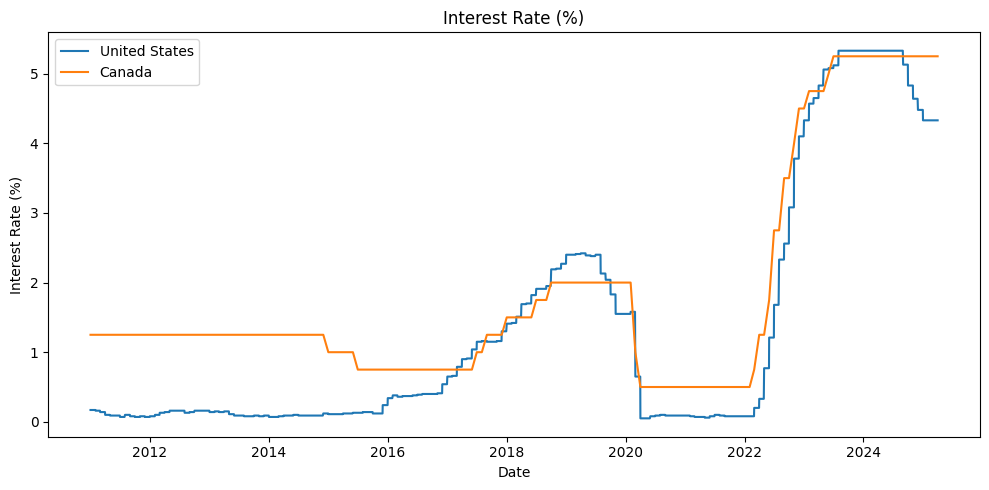

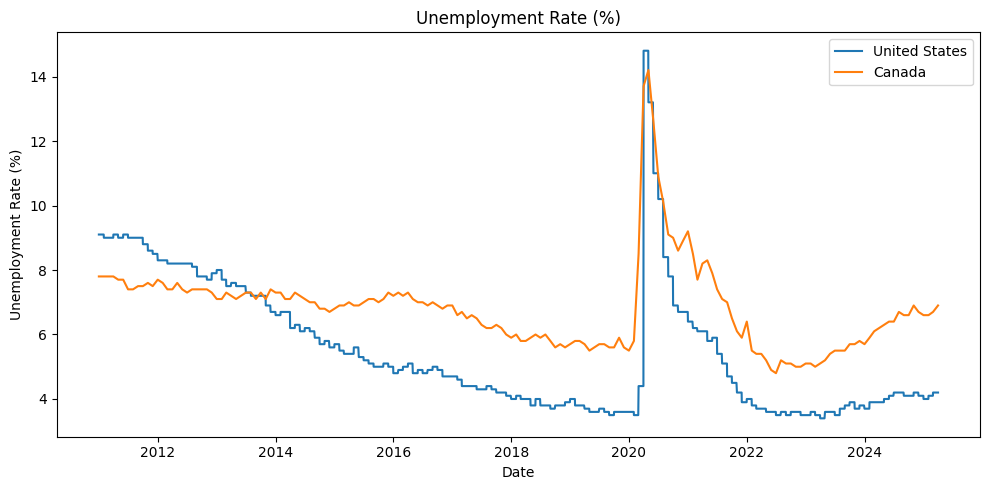

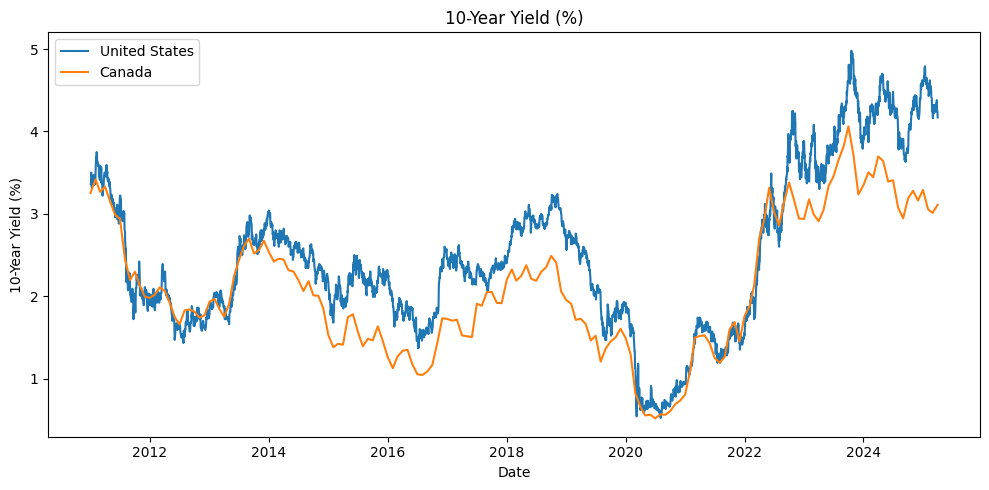

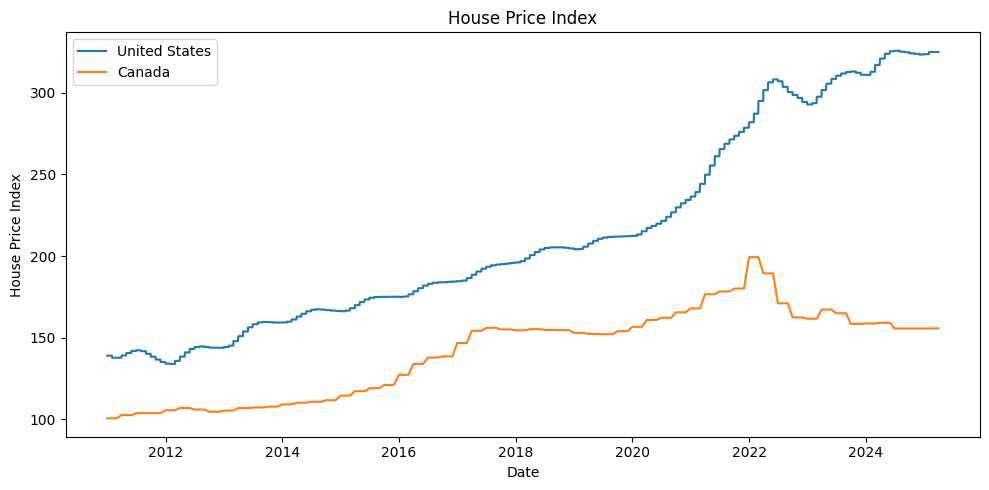

In [26]:

df_usa["Date"]    = pd.to_datetime(df_usa["Date"])
df_canada["Date"] = pd.to_datetime(df_canada["Date"])

pairs = [
    ("Interest Rate (%)",           "US_Interest_Rate",       "CA_Interest_Rate"),
    ("Unemployment Rate (%)",       "US_Unemployment_Rate",   "CA_Unemployment_Rate"),
    ("10-Year Yield (%)",           "US_10y_Yield",           "CA_10y_Yield"),
    ("House Price Index",           "US_House_Price_Index",   "CA_House_Price_Index"),

]

for title, us_col, ca_col in pairs:
    plt.figure(figsize=(10, 5))
    plt.plot(df_usa["Date"],    df_usa[us_col],    label="United States")
    plt.plot(df_canada["Date"], df_canada[ca_col], label="Canada")
    plt.title(title)
    plt.xlabel("Date")
    plt.ylabel(title)
    plt.legend()
    plt.tight_layout()          # avoids label cutoff
    plt.show()



In [27]:
print("First 10 rows of forex_df (USD/CAD Exchange Rate):")
display(forex_df.head(10))

print("\n US First 10 rows of dataframe_usa (U.S. Macro Indicators):")
display(df_usa.head(10))

print("\n CA First 10 rows of dataframe_canada (Canada Macro Indicators):")
display(df_canada.head(10))

First 10 rows of forex_df (USD/CAD Exchange Rate):


,Date,USDCAD
0,2011-01-03,0.99270
1,2011-01-04,0.99239
2,2011-01-05,0.99700
3,2011-01-06,0.99650
4,2011-01-07,0.99750
5,2011-01-10,0.99180
6,2011-01-11,0.99260
7,2011-01-12,0.98917
8,2011-01-13,0.98640
9,2011-01-14,0.98903



 US First 10 rows of dataframe_usa (U.S. Macro Indicators):


,Date,US_Interest_Rate,US_CPI,US_Unemployment_Rate,US_10y_Yield,US_Exports,US_Imports,US_House_Price_Index,US_Retail_Spend
0,2011-01-01,0.17,221.187,9.1,NaN,2040.407,2608.884,139.032,10558.195
1,2011-01-03,0.17,221.187,9.1,3.36,2040.407,2608.884,139.032,10558.195
2,2011-01-04,0.17,221.187,9.1,3.36,2040.407,2608.884,139.032,10558.195
3,2011-01-05,0.17,221.187,9.1,3.50,2040.407,2608.884,139.032,10558.195
4,2011-01-06,0.17,221.187,9.1,3.44,2040.407,2608.884,139.032,10558.195
5,2011-01-07,0.17,221.187,9.1,3.34,2040.407,2608.884,139.032,10558.195
6,2011-01-10,0.17,221.187,9.1,3.32,2040.407,2608.884,139.032,10558.195
7,2011-01-11,0.17,221.187,9.1,3.37,2040.407,2608.884,139.032,10558.195
8,2011-01-12,0.17,221.187,9.1,3.40,2040.407,2608.884,139.032,10558.195
9,2011-01-13,0.17,221.187,9.1,3.34,2040.407,2608.884,139.032,10558.195



 CA First 10 rows of dataframe_canada (Canada Macro Indicators):


,Date,CA_Interest_Rate,CA_CPI,CA_Unemployment_Rate,CA_10y_Yield,CA_Exports,CA_Imports,CA_House_Price_Index,CA_Retail_Spend
0,2011-01-01,1.25,93.07348,7.8,3.253000,108.5252,109.5027,100.6800,238.139
1,2011-02-01,1.25,93.31051,7.8,3.417368,108.5252,109.5027,100.6800,238.139
2,2011-03-01,1.25,94.33763,7.8,3.266522,108.5252,109.5027,100.6800,238.139
3,2011-04-01,1.25,94.65367,7.8,3.328000,110.7913,113.7914,102.6874,240.783
4,2011-05-01,1.25,95.28575,7.7,3.151905,110.7913,113.7914,102.6874,240.783
5,2011-06-01,1.25,94.65367,7.7,2.987727,110.7913,113.7914,102.6874,240.783
6,2011-07-01,1.25,94.81169,7.4,2.938500,117.0714,114.8865,103.8639,242.665
7,2011-08-01,1.25,95.04872,7.4,2.446364,117.0714,114.8865,103.8639,242.665
8,2011-09-01,1.25,95.28575,7.5,2.196667,117.0714,114.8865,103.8639,242.665
9,2011-10-01,1.25,95.44377,7.5,2.296000,115.1292,113.4401,103.8513,245.497


In [28]:
for df in [forex_df, df_usa, df_canada]:
    if df.index.name == 'Date' or df.index.names == ['Date']:
        df.reset_index(inplace=True)

# Step 2: Ensure 'Date' column is in datetime format
forex_df['Date'] = pd.to_datetime(forex_df['Date'])
df_usa['Date'] = pd.to_datetime(df_usa['Date'])
df_canada['Date'] = pd.to_datetime(df_canada['Date'])

# Step 3: Set 'Date' as index for merge
forex_df.set_index('Date', inplace=True)
df_usa.set_index('Date', inplace=True)
df_canada.set_index('Date', inplace=True)

# Step 4: Merge on date
df_merged = forex_df.join([df_usa, df_canada], how='left')
df_merged.dropna(inplace=True)

# Step 5: Reset index and move 'Date' to column
df_merged = df_merged.reset_index()  # 'Date' becomes a column again
cols = ['Date'] + [col for col in df_merged.columns if col != 'Date']
df_merged = df_merged[cols]

# Preview
print("Final merged DataFrame with 'Date' as first column:")
display(df_merged.head())

Final merged DataFrame with 'Date' as first column:


,Date,USDCAD,US_Interest_Rate,US_CPI,US_Unemployment_Rate,US_10y_Yield,US_Exports,US_Imports,US_House_Price_Index,US_Retail_Spend,CA_Interest_Rate,CA_CPI,CA_Unemployment_Rate,CA_10y_Yield,CA_Exports,CA_Imports,CA_House_Price_Index,CA_Retail_Spend
0,2011-02-01,0.99990,0.16,221.898,9.0,3.48,2040.407,2608.884,137.727,10558.195,1.25,93.31051,7.8,3.417368,108.5252,109.5027,100.6800,238.139
1,2011-03-01,0.97111,0.14,223.046,9.0,3.41,2040.407,2608.884,137.781,10558.195,1.25,94.33763,7.8,3.266522,108.5252,109.5027,100.6800,238.139
2,2011-04-01,0.96970,0.10,224.093,9.1,3.46,2116.132,2697.224,139.156,10673.018,1.25,94.65367,7.8,3.328000,110.7913,113.7914,102.6874,240.783
3,2011-06-01,0.96740,0.09,224.806,9.1,2.96,2116.132,2697.224,141.944,10673.018,1.25,94.65367,7.7,2.987727,110.7913,113.7914,102.6874,240.783
4,2011-07-01,0.96380,0.07,225.395,9.0,3.22,2156.793,2723.903,142.342,10755.029,1.25,94.81169,7.4,2.938500,117.0714,114.8865,103.8639,242.665


# Model

In [29]:
# Step 1: Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam

# Step 2: Load and sort data
df = df_merged
df['Date'] = pd.to_datetime(df['Date'])
df = df.sort_values(by='Date').reset_index(drop=True)

# Step 3: Feature setup
X_full = df.drop(columns=['Date'])         # Includes USDCAD as input
y = df[['USDCAD']]                          # Target to predict

# Step 4: Normalize input and output
x_scaler = MinMaxScaler()
y_scaler = MinMaxScaler()
X_scaled_full = x_scaler.fit_transform(X_full)
y_scaled = y_scaler.fit_transform(y)

# Step 5: Train/Test split
split_index = int(len(X_scaled_full) * 0.85)

X_train = X_scaled_full[:split_index]      # Keep USDCAD in training input
y_train = y_scaled[:split_index]

X_test = X_scaled_full[split_index:].copy()
X_test[:, 0] = 0.0                          # Mask out USDCAD feature at test time

y_test = y_scaled[split_index:]
date_test = df['Date'][split_index:].reset_index(drop=True)

# Step 6: Build MLP model
model = Sequential([
    Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(64, activation='relu'),
    Dense(32, activation='relu'),
    Dense(1)
])
model.compile(optimizer=Adam(learning_rate=1e-4), loss='mse', metrics=['mae'])

# Step 7: Train model
early_stop = EarlyStopping(patience=10, restore_best_weights=True)
history = model.fit(
    X_train, y_train,
    validation_split=0.15,
    epochs=100,
    batch_size=8,
    callbacks=[early_stop],
    verbose=1
)

# Step 8: Predict and inverse transform
y_pred_scaled = model.predict(X_test)
y_pred = y_scaler.inverse_transform(y_pred_scaled)
y_test_actual = y_scaler.inverse_transform(y_test)

# Step 9: Metrics
mae = mean_absolute_error(y_test_actual, y_pred)
rmse = np.sqrt(mean_squared_error(y_test_actual, y_pred))
print(f"MLP Test MAE: {mae:.4f}")
print(f"MLP Test RMSE: {rmse:.4f}")



/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - loss: 0.3728 - mae: 0.5027 - val_loss: 0.5545 - val_mae: 0.7419
Epoch 2/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.3300 - mae: 0.4707 - val_loss: 0.4198 - val_mae: 0.6461
Epoch 3/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.2597 - mae: 0.4082 - val_loss: 0.3031 - val_mae: 0.5491
Epoch 4/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.2416 - mae: 0.4208 - val_loss: 0.2026 - val_mae: 0.4472
Epoch 5/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.2153 - mae: 0.4007 - val_loss: 0.1224 - val_mae: 0.3436
Epoch 6/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.1547 - mae: 0.3312 - val_loss: 0.0702 - val_mae: 0.2527
Epoch 7/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.1246 - mae: 0.2991 - val_loss: 0.0380 - val_mae: 0.1735
Epoch 8/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.1038 - mae: 0.2822 - val_loss: 0.0191 - val_mae: 0.1128
Epoch 9/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.

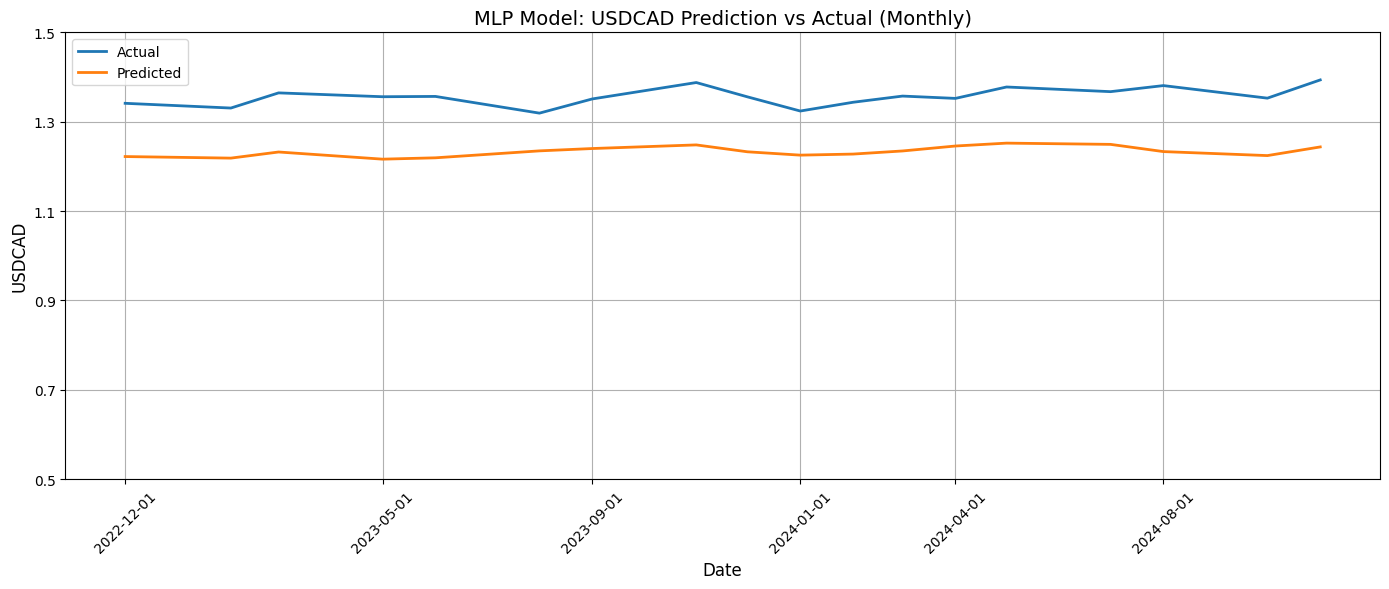

In [30]:
# Step 10: Plot results
plt.figure(figsize=(14, 6))
plt.plot(date_test, y_test_actual, label='Actual', linewidth=2)
plt.plot(date_test, y_pred, label='Predicted', linewidth=2)

plt.title("MLP Model: USDCAD Prediction vs Actual (Monthly)", fontsize=14)
plt.xlabel("Date", fontsize=12)
plt.ylabel("USDCAD", fontsize=12)
plt.yticks(np.arange(0.5, 1.6, 0.2))
plt.xticks(date_test[::3], rotation=45)  # every 3rd month
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


In [31]:
# Step 1: Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.callbacks import EarlyStopping

# Step 2: Load and sort data
df = df_merged
df['Date'] = pd.to_datetime(df['Date'])
df = df.sort_values(by='Date').reset_index(drop=True)

# Step 3: Normalize features and target
X_full = df.drop(columns=['Date'])
y = df[['USDCAD']]  # Save separately for inverse transform

x_scaler = MinMaxScaler()
y_scaler = MinMaxScaler()

X_scaled_full = x_scaler.fit_transform(X_full)
y_scaled = y_scaler.fit_transform(y)

# Step 4: Create sequences
SEQ_LEN = 3  # Use past 3 months to predict next

X_seq, y_seq = [], []
for i in range(len(X_scaled_full) - SEQ_LEN):
    X_seq.append(X_scaled_full[i:i+SEQ_LEN])
    y_seq.append(y_scaled[i+SEQ_LEN])  # 1-step ahead

X_seq = np.array(X_seq)
y_seq = np.array(y_seq)

# Step 5: Train/Test Split
split_index = int(len(X_seq) * 0.85)

X_train = X_seq[:split_index]
y_train = y_seq[:split_index]

X_test = X_seq[split_index:]
y_test = y_seq[split_index:]

# Mask USDCAD in test sequences (column index 0)
X_test_masked = X_test.copy()
X_test_masked[:, :, 0] = 0.0  # Set USDCAD feature to zero

# Save test dates
test_dates = df['Date'].iloc[SEQ_LEN + split_index:].reset_index(drop=True)

# Step 6: Define LSTM Model
model = Sequential([
    LSTM(64, activation='tanh', input_shape=(SEQ_LEN, X_seq.shape[2])),
    Dense(32, activation='relu'),
    Dense(1)
])
model.compile(optimizer='adam', loss='mse', metrics=['mae'])

# Step 7: Train Model
early_stop = EarlyStopping(patience=10, restore_best_weights=True)
history = model.fit(
    X_train, y_train,
    validation_split=0.1,
    epochs=100,
    batch_size=8,
    callbacks=[early_stop],
    verbose=1
)

# Step 8: Evaluate and Inverse Transform
y_pred_scaled = model.predict(X_test_masked)
y_pred = y_scaler.inverse_transform(y_pred_scaled)
y_test_actual = y_scaler.inverse_transform(y_test)

mae = mean_absolute_error(y_test_actual, y_pred)
rmse = np.sqrt(mean_squared_error(y_test_actual, y_pred))

print(f"LSTM Test MAE: {mae:.4f}")
print(f"LSTM Test RMSE: {rmse:.4f}")



Epoch 1/100


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


12/12 ━━━━━━━━━━━━━━━━━━━━ 4s 58ms/step - loss: 0.4693 - mae: 0.6040 - val_loss: 0.1630 - val_mae: 0.4015
Epoch 2/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0913 - mae: 0.2542 - val_loss: 0.0798 - val_mae: 0.2768
Epoch 3/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0364 - mae: 0.1655 - val_loss: 0.0113 - val_mae: 0.0995
Epoch 4/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0193 - mae: 0.1071 - val_loss: 0.0312 - val_mae: 0.1727
Epoch 5/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0130 - mae: 0.0972 - val_loss: 0.0148 - val_mae: 0.1169
Epoch 6/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0117 - mae: 0.0824 - val_loss: 0.0095 - val_mae: 0.0920
Epoch 7/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0091 - mae: 0.0753 - val_loss: 0.0033 - val_mae: 0.0474
Epoch 8/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0105 - mae: 0.0748 - val_loss: 0.0047 - val_mae: 0.0609
Epoch 9/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0086 -

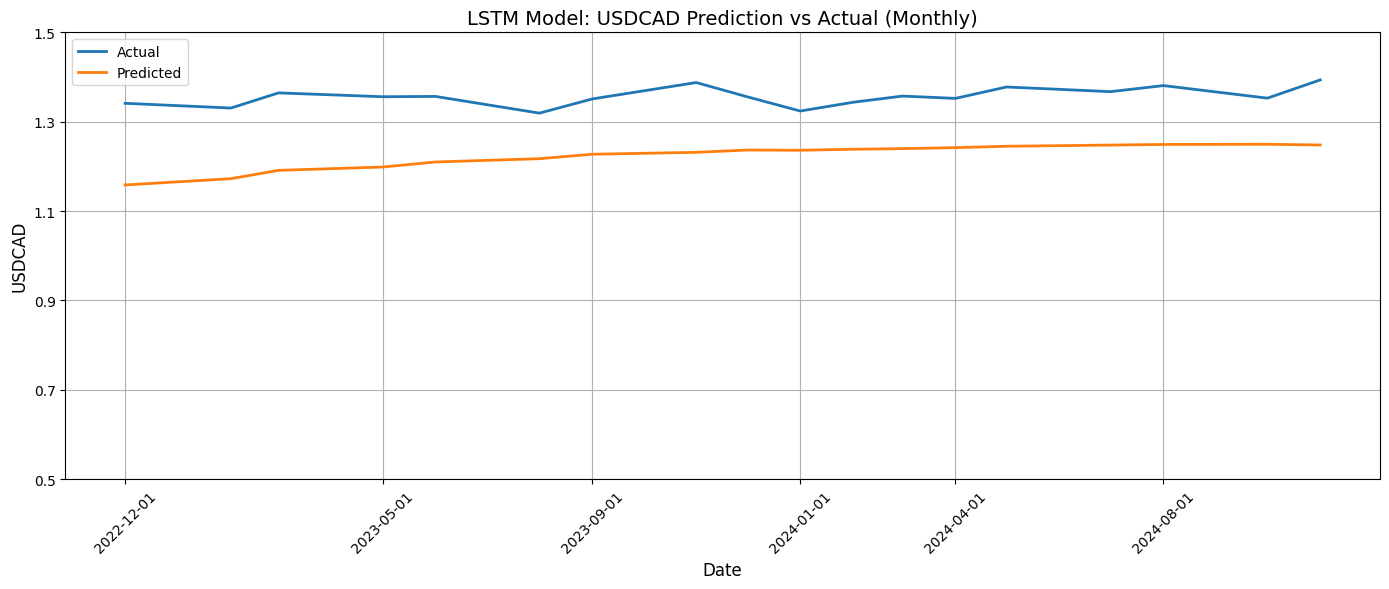

In [32]:
# Step 9: Plot Actual vs Predicted
plt.figure(figsize=(14, 6))
plt.plot(test_dates, y_test_actual, label='Actual', linewidth=2)
plt.plot(test_dates, y_pred, label='Predicted', linewidth=2)

plt.title("LSTM Model: USDCAD Prediction vs Actual (Monthly)", fontsize=14)
plt.xlabel("Date", fontsize=12)
plt.ylabel("USDCAD", fontsize=12)
plt.yticks(np.arange(0.5, 1.6, 0.2))
plt.xticks(test_dates[::3], rotation=45)  # Show every 3rd month
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

In [35]:
# Step 1: Imports
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error
import matplotlib.pyplot as plt
from tcn import TCN
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import EarlyStopping

# Step 2: Load and sort data
df = df_merged
df['Date'] = pd.to_datetime(df['Date'])
df = df.sort_values(by='Date').reset_index(drop=True)

# Step 3: Normalize all features (including USDCAD for now)
full_features = df.drop(columns=['Date'])
x_scaler = MinMaxScaler()
y_scaler = MinMaxScaler()
X_scaled_all = x_scaler.fit_transform(full_features)
y_scaled = y_scaler.fit_transform(df[['USDCAD']])

# Step 4: Sequence preparation (including USDCAD in input temporarily)
SEQ_LEN = 6
X_seq, y_seq = [], []
for i in range(len(X_scaled_all) - SEQ_LEN):
    X_seq.append(X_scaled_all[i:i+SEQ_LEN])
    y_seq.append(y_scaled[i+SEQ_LEN])
X_seq = np.array(X_seq)
y_seq = np.array(y_seq)

# Step 5: Train-test split
split_index = int(len(X_seq) * 0.8)
X_train = X_seq[:split_index]                 # USDCAD used in training
y_train = y_seq[:split_index]

X_test = X_seq[split_index:].copy()          # Mask USDCAD in test input
X_test[:, :, 0] = 0.0                         # Column 0 = USDCAD
y_test = y_seq[split_index:]
date_test = df['Date'].iloc[SEQ_LEN + split_index:].reset_index(drop=True)

# Step 6: Define TCN model
model = Sequential([
    TCN(input_shape=(SEQ_LEN, X_seq.shape[2]), nb_filters=64, kernel_size=2, dropout_rate=0.2),
    Dense(32, activation='relu'),
    Dense(1)
])
model.compile(optimizer='adam', loss='mse', metrics=['mae'])

# Step 7: Train
early_stop = EarlyStopping(patience=10, restore_best_weights=True)
history = model.fit(
    X_train, y_train,
    validation_split=0.2,
    epochs=100,
    batch_size=8,
    callbacks=[early_stop],
    verbose=1
)

# Step 8: Predict + inverse transform
y_pred_scaled = model.predict(X_test)
y_pred = y_scaler.inverse_transform(y_pred_scaled)
y_test_actual = y_scaler.inverse_transform(y_test)

# Step 9: Metrics
mae = mean_absolute_error(y_test_actual, y_pred)
rmse = np.sqrt(mean_squared_error(y_test_actual, y_pred))
print(f"TCN Test MAE: {mae:.4f}")
print(f"TCN Test RMSE: {rmse:.4f}")


/usr/local/lib/python3.11/dist-packages/tcn/tcn.py:268: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super(TCN, self).__init__(**kwargs)


Epoch 1/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 8s 96ms/step - loss: 9.7279 - mae: 2.5426 - val_loss: 0.4998 - val_mae: 0.6588
Epoch 2/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - loss: 0.9373 - mae: 0.7315 - val_loss: 0.4822 - val_mae: 0.6048
Epoch 3/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.7529 - mae: 0.6936 - val_loss: 0.2948 - val_mae: 0.4101
Epoch 4/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.8021 - mae: 0.6964 - val_loss: 0.1309 - val_mae: 0.2899
Epoch 5/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.3239 - mae: 0.4728 - val_loss: 0.1626 - val_mae: 0.3503
Epoch 6/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.2768 - mae: 0.4536 - val_loss: 0.0953 - val_mae: 0.2301
Epoch 7/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.1669 - mae: 0.3302 - val_loss: 0.0869 - val_mae: 0.2181
Epoch 8/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.2407 - mae: 0.3778 - val_loss: 0.1176 - val_mae: 0.2896
Epoch 9/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.1772 - mae: 

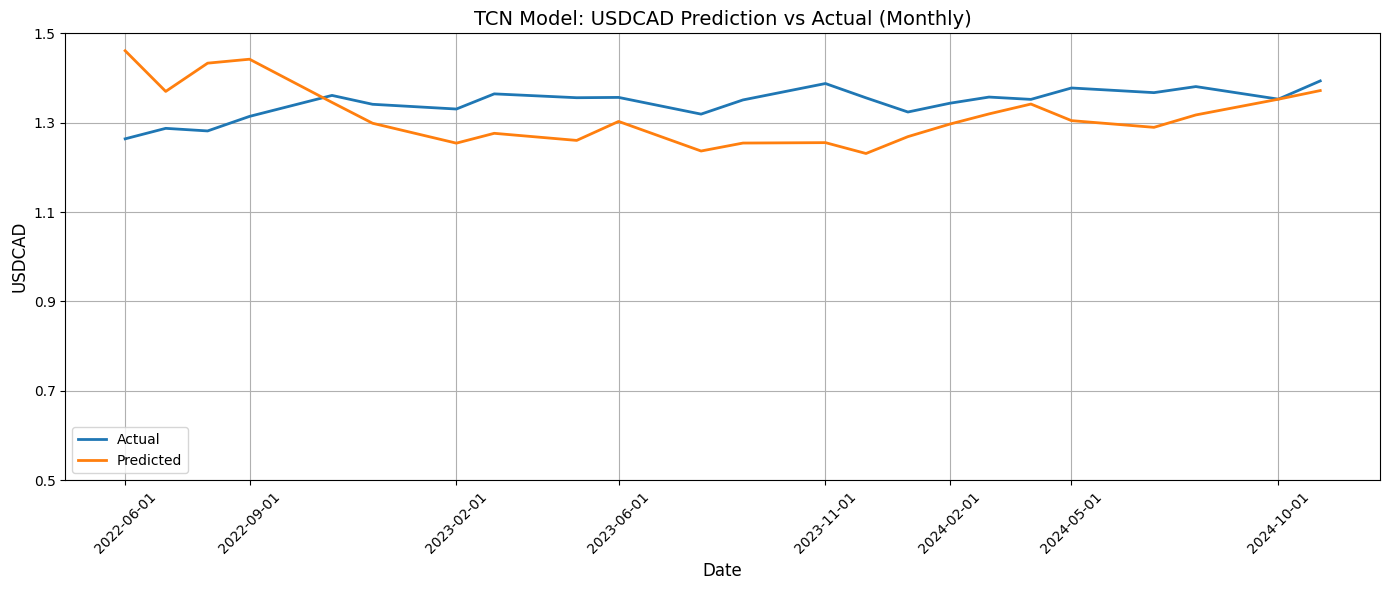

In [36]:

# Step 10: Plot
plt.figure(figsize=(14, 6))
plt.plot(date_test, y_test_actual, label='Actual', linewidth=2)
plt.plot(date_test, y_pred, label='Predicted', linewidth=2)
plt.title("TCN Model: USDCAD Prediction vs Actual (Monthly)", fontsize=14)
plt.xlabel("Date", fontsize=12)
plt.ylabel("USDCAD", fontsize=12)
plt.yticks(np.arange(0.5, 1.6, 0.2))
plt.xticks(date_test[::3], rotation=45)  # every 3rd month
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

In [38]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, LSTM, RepeatVector, TimeDistributed, Dense
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Load and preprocess
df = df_merged
df['Date'] = pd.to_datetime(df['Date'])
df = df.sort_values(by='Date').reset_index(drop=True)

# Use full features (including USDCAD) temporarily
full_features = df.drop(columns=['Date'])
target = df[['USDCAD']]

x_scaler = MinMaxScaler()
y_scaler = MinMaxScaler()
X_scaled = x_scaler.fit_transform(full_features)
y_scaled = y_scaler.fit_transform(target)

# Sequence lengths
SEQ_LEN_IN = 2
SEQ_LEN_OUT = 1

# Create sequences
X_seq, y_seq = [], []
for i in range(len(X_scaled) - SEQ_LEN_IN - SEQ_LEN_OUT):
    X_seq.append(X_scaled[i:i+SEQ_LEN_IN])
    y_seq.append(y_scaled[i+SEQ_LEN_IN:i+SEQ_LEN_IN+SEQ_LEN_OUT])

X_seq = np.array(X_seq)
y_seq = np.array(y_seq)

# Split data
split = int(len(X_seq)*0.8)
X_train = X_seq[:split]
y_train = y_seq[:split]

X_test = X_seq[split:].copy()  # Copy before masking
y_test = y_seq[split:]

# === Mask USDCAD (column 0) in test input sequences ===
X_test[:, :, 0] = 0.0

# Build Seq2Seq model
inputs = Input(shape=(SEQ_LEN_IN, X_seq.shape[2]))
encoded = LSTM(128)(inputs)
decoded = RepeatVector(SEQ_LEN_OUT)(encoded)
decoded = LSTM(64, return_sequences=True)(decoded)
outputs = TimeDistributed(Dense(1))(decoded)

model = Model(inputs, outputs)
model.compile(optimizer='adam', loss='mse')

# Train
model.fit(X_train, y_train, validation_split=0.2, epochs=100, batch_size=8, verbose=1)

# Predict
y_pred = model.predict(X_test)

# Use only the last step of each prediction sequence
y_pred_flat = y_scaler.inverse_transform(y_pred[:, -1])
y_test_flat = y_scaler.inverse_transform(y_test[:, -1])

# Dates for plotting
test_dates = df['Date'].iloc[SEQ_LEN_IN + SEQ_LEN_OUT + split:].reset_index(drop=True)

# Metrics
mae = mean_absolute_error(y_test_flat, y_pred_flat)
rmse = np.sqrt(mean_squared_error(y_test_flat, y_pred_flat))
print(f"Seq2Seq Test MAE: {mae:.4f}")
print(f"Seq2Seq Test RMSE: {rmse:.4f}")



Epoch 1/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 10s 285ms/step - loss: 0.3543 - val_loss: 0.2454
Epoch 2/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 48ms/step - loss: 0.1212 - val_loss: 0.0598
Epoch 3/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 44ms/step - loss: 0.0670 - val_loss: 0.0504
Epoch 4/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - loss: 0.0390 - val_loss: 0.0420
Epoch 5/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 51ms/step - loss: 0.0226 - val_loss: 0.0983
Epoch 6/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 90ms/step - loss: 0.0194 - val_loss: 0.0749
Epoch 7/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 73ms/step - loss: 0.0170 - val_loss: 0.1035
Epoch 8/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 64ms/step - loss: 0.0110 - val_loss: 0.1088
Epoch 9/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - loss: 0.0097 - val_loss: 0.1033
Epoch 10/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - loss: 0.0080 - val_loss: 0.1131
Epoch 11/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - loss: 0.0062 - val_loss: 0.1180
Epoch 12/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 47ms/st

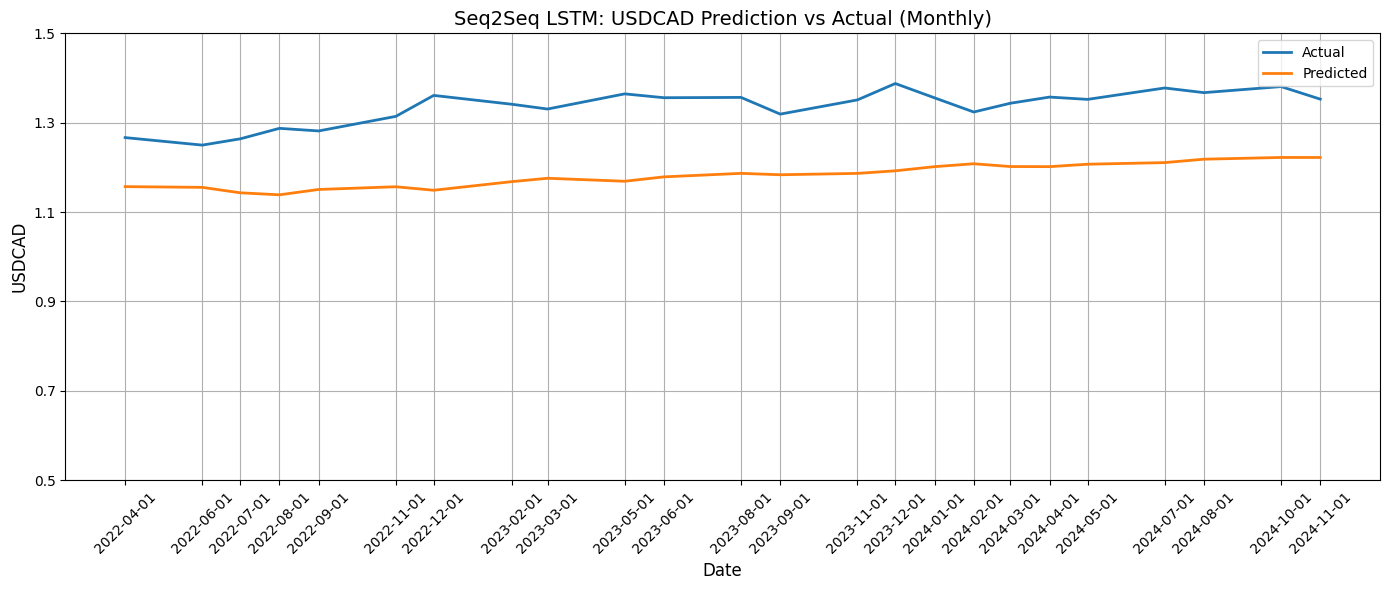

In [39]:
# Plot
plt.figure(figsize=(14, 6))
plt.plot(test_dates, y_test_flat, label='Actual', linewidth=2)
plt.plot(test_dates, y_pred_flat, label='Predicted', linewidth=2)

plt.title("Seq2Seq LSTM: USDCAD Prediction vs Actual (Monthly)", fontsize=14)
plt.xlabel("Date", fontsize=12)
plt.ylabel("USDCAD", fontsize=12)
plt.yticks(np.arange(0.5, 1.6, 0.2))
plt.xticks(test_dates[::1], rotation=45)
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

In [42]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error

from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, LSTM, Dense, Layer, Dropout
from tensorflow.keras.callbacks import EarlyStopping
import tensorflow.keras.backend as K

# Step 1: Load and preprocess data
df = df_merged
df['Date'] = pd.to_datetime(df['Date'])
df = df.sort_values(by='Date').reset_index(drop=True)

full_features = df.drop(columns=['Date'])     # includes USDCAD temporarily
target = df[['USDCAD']]

x_scaler = MinMaxScaler()
y_scaler = MinMaxScaler()

X_scaled_full = x_scaler.fit_transform(full_features)
y_scaled = y_scaler.fit_transform(target)

# Step 2: Create sequences
SEQ_LEN = 3
X_seq, y_seq = [], []

for i in range(len(X_scaled_full) - SEQ_LEN):
    X_seq.append(X_scaled_full[i:i+SEQ_LEN])
    y_seq.append(y_scaled[i+SEQ_LEN])

X_seq = np.array(X_seq)
y_seq = np.array(y_seq)

# Step 3: Train-test split
split = int(len(X_seq) * 0.8)

X_train = X_seq[:split]                        # Keep USDCAD in training
y_train = y_seq[:split]

X_test = X_seq[split:].copy()                 # Copy to apply masking
X_test[:, :, 0] = 0.0                         # Mask USDCAD (assumed to be column 0)
y_test = y_seq[split:]

date_test = df['Date'].iloc[SEQ_LEN + split:].reset_index(drop=True)

# Step 4: Custom Attention Layer
class Attention(Layer):
    def __init__(self, **kwargs):
        super(Attention, self).__init__(**kwargs)

    def call(self, inputs):
        score = K.softmax(K.sum(inputs, axis=2), axis=1)  # (batch, timesteps)
        context = K.sum(inputs * K.expand_dims(score), axis=1)  # (batch, features)
        return context

# Step 5: Build Attention-LSTM model
inputs = Input(shape=(SEQ_LEN, X_seq.shape[2]))
lstm_out = LSTM(64, return_sequences=True)(inputs)
attention_out = Attention()(lstm_out)
dense1 = Dense(32, activation='relu')(attention_out)
drop = Dropout(0.2)(dense1)
output = Dense(1)(drop)

model = Model(inputs, output)
model.compile(optimizer='adam', loss='mse', metrics=['mae'])

# Step 6: Train model
early_stop = EarlyStopping(patience=10, restore_best_weights=True)
model.fit(
    X_train, y_train,
    validation_split=0.2,
    epochs=100,
    batch_size=8,
    callbacks=[early_stop],
    verbose=1
)

# Step 7: Predict and inverse transform
y_pred_scaled = model.predict(X_test)
y_pred = y_scaler.inverse_transform(y_pred_scaled)
y_test_actual = y_scaler.inverse_transform(y_test)

# Step 8: Evaluation
mae = mean_absolute_error(y_test_actual, y_pred)
rmse = np.sqrt(mean_squared_error(y_test_actual, y_pred))
print(f"Attention-LSTM Test MAE: {mae:.4f}")
print(f"Attention-LSTM Test RMSE: {rmse:.4f}")



Epoch 1/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 5s 148ms/step - loss: 0.3191 - mae: 0.4754 - val_loss: 0.2118 - val_mae: 0.4364
Epoch 2/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - loss: 0.1363 - mae: 0.3106 - val_loss: 0.0355 - val_mae: 0.1525
Epoch 3/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - loss: 0.0971 - mae: 0.2735 - val_loss: 0.0738 - val_mae: 0.2410
Epoch 4/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 50ms/step - loss: 0.0545 - mae: 0.1989 - val_loss: 0.0427 - val_mae: 0.1914
Epoch 5/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0435 - mae: 0.1787 - val_loss: 0.0500 - val_mae: 0.2059
Epoch 6/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0357 - mae: 0.1600 - val_loss: 0.1349 - val_mae: 0.3095
Epoch 7/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - loss: 0.0344 - mae: 0.1532 - val_loss: 0.1166 - val_mae: 0.2930
Epoch 8/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0274 - mae: 0.1138 - val_loss: 0.1404 - val_mae: 0.3193
Epoch 9/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - l

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 210ms/step
Attention-LSTM Test MAE: 0.0240
Attention-LSTM Test RMSE: 0.0316


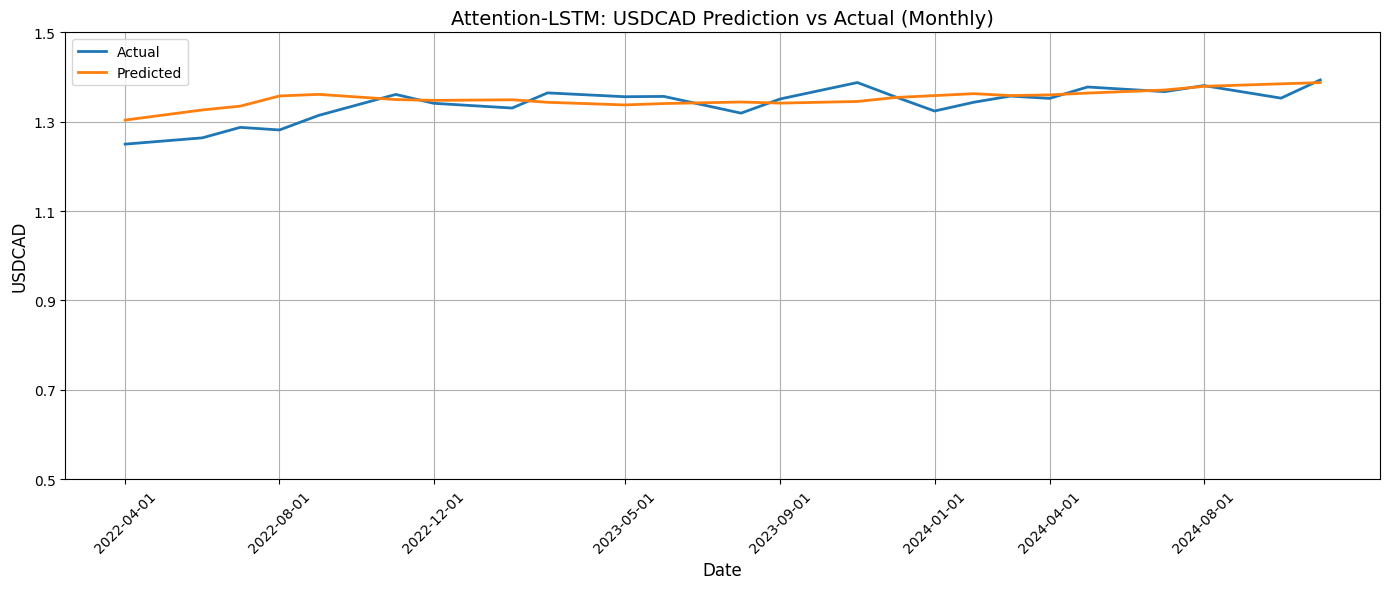

In [43]:
# Step 9: Plot Actual vs Predicted (monthly with custom Y axis)
plt.figure(figsize=(14, 6))
plt.plot(date_test, y_test_actual, label='Actual', linewidth=2)
plt.plot(date_test, y_pred, label='Predicted', linewidth=2)

plt.title("Attention-LSTM: USDCAD Prediction vs Actual (Monthly)", fontsize=14)
plt.xlabel("Date", fontsize=12)
plt.ylabel("USDCAD", fontsize=12)
plt.yticks(np.arange(0.5, 1.6, 0.2))
plt.xticks(date_test[::3], rotation=45)
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()